In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

## Importing Weather Dataset

In [5]:
df= pd.read_csv(r"C:\ML\Kolkata_weather_data(2017-2022).csv")
df.head(3)

,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Info,Conditions
0,"Kolkata,West Bengal,India",01/01/2017,14.0,25.3,19.9,16.5,82.47,NaN,5.8,NaN,...,1.2,4.9,1015.9,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
1,"Kolkata,West Bengal,India",01/02/2017,16.0,26.0,20.6,16.0,76.76,NaN,8.1,NaN,...,1.4,0.3,1015.6,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
2,"Kolkata,West Bengal,India",01/03/2017,16.0,27.0,21.1,15.6,73.12,27.3,9.2,NaN,...,1.6,10.7,1014.7,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear


## Data cleaning and Feature Selection

<Axes: >

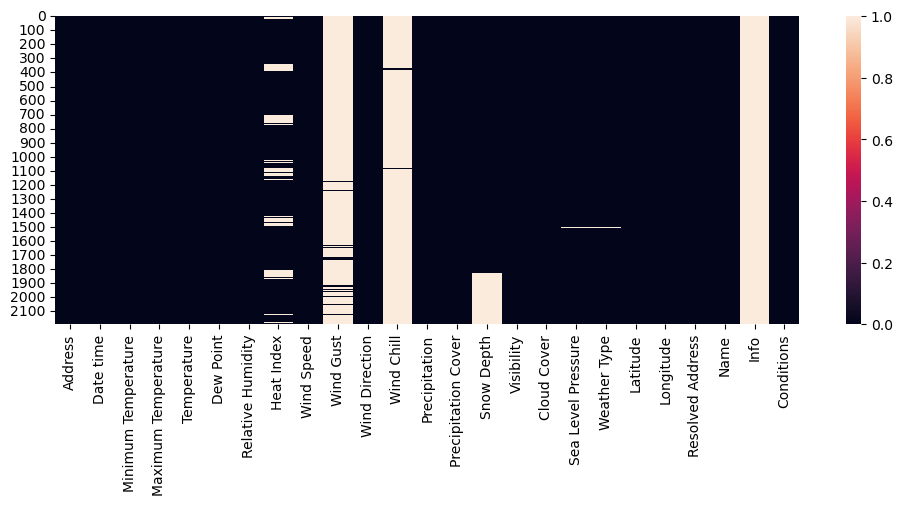

In [7]:
null_value=df.isna()
plt.figure(figsize=(12,4))
sns.heatmap(null_value)

In [8]:
#In this figure some of the features like Wind Chill, Wind Speed, Heat Index and info is having more than half of the values NaN, so we dropped the columns 
#and for sea level pressure (there only one nan value) hence that row is dropped. 
#after this some not significant features are dropped, and since no selected feature is having string value after feature selection 
# so no encoding was required.

In [9]:
a=df[['Wind Speed','Visibility','Cloud Cover'	,'Sea Level Pressure','Precipitation','Relative Humidity','Temperature']]
a=a.dropna()
print(a.isna().sum())

Wind Speed            0
Visibility            0
Cloud Cover           0
Sea Level Pressure    0
Precipitation         0
Relative Humidity     0
Temperature           0
dtype: int64


<Axes: >

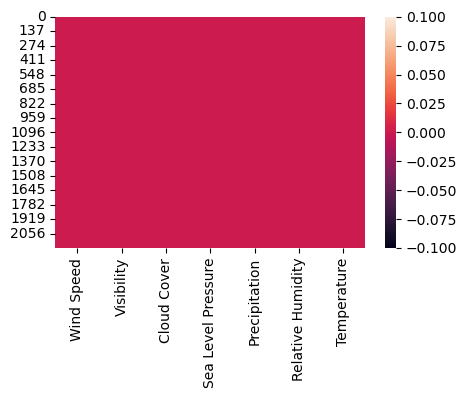

In [10]:
nan_values= a.isna()
plt.figure(figsize=(5,3))
sns.heatmap(nan_values)

## Outliers Detection and Removal

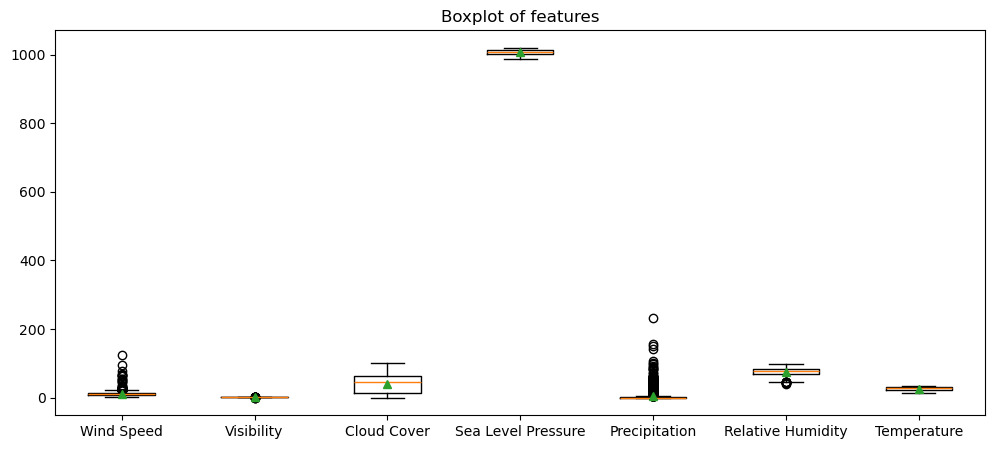

In [12]:
plt.figure(figsize=(12,5))
plt.boxplot(a,labels=['Wind Speed','Visibility','Cloud Cover','Sea Level Pressure','Precipitation','Relative Humidity','Temperature'], showmeans=True)
plt.title("Boxplot of features")
plt.show()

In [13]:
q1=a['Precipitation'].quantile(0.25)
q3=a['Precipitation'].quantile(0.75)
iqr=q3-q1
min_range= q1-1.5*iqr
max_range= q3+1.5*iqr
print(min_range)
print(max_range)

-2.51625
4.19375


(1757, 7)


Text(0.5, 1.0, 'After Removing Outliers')

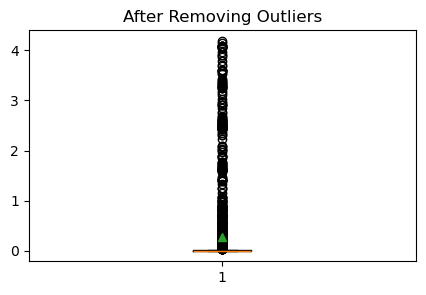

In [14]:
a=a[(a['Precipitation']<=max_range) & (a['Precipitation']>=min_range)]
print(a.shape)
plt.figure(figsize=(5,3))
plt.boxplot(a['Precipitation'],showmeans=True)
plt.title('After Removing Outliers')

In [15]:
q1=a['Wind Speed'].quantile(0.25)
q3=a['Wind Speed'].quantile(0.75)
iqr=q3-q1
min_range= q1-1.5*iqr
max_range= q3+1.5*iqr
print(min_range)
print(max_range)

1.049999999999998
19.85


(1718, 7)


Text(0.5, 1.0, 'After Removing Outliers')

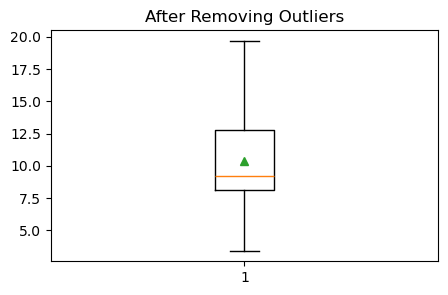

In [16]:
a=a[(a['Wind Speed']<=max_range) & (a['Wind Speed']>=min_range)]
print(a.shape)
plt.figure(figsize=(5,3))
plt.boxplot(a['Wind Speed'],showmeans=True)
ylabel=("Wind Speed")
plt.title('After Removing Outliers')

## Data Normalization

In [18]:
from sklearn.preprocessing import StandardScaler 

<class 'numpy.ndarray'>


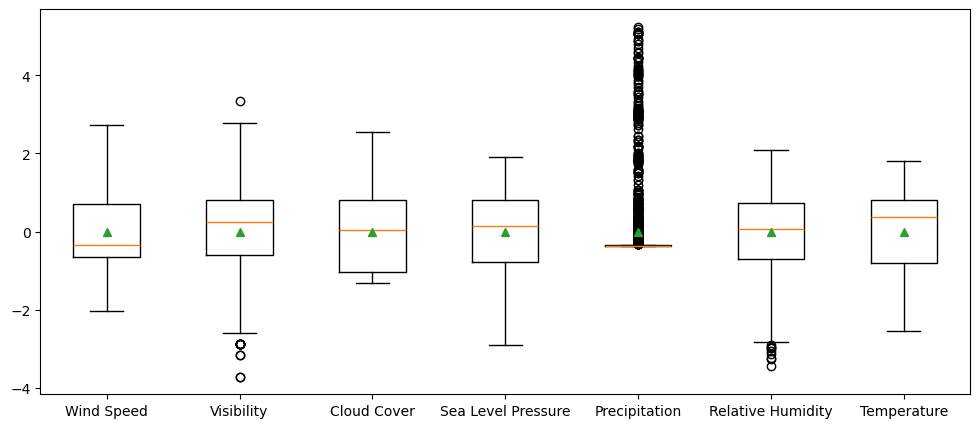

In [19]:
scalar =StandardScaler()
scaled_features=scalar.fit_transform(a)
print(type(scaled_features))
flower_scaled=pd.DataFrame(scaled_features)
plt.figure(figsize=(12,5))
plt.boxplot(scaled_features,labels=['Wind Speed','Visibility','Cloud Cover','Sea Level Pressure','Precipitation','Relative Humidity','Temperature'],showmeans=True)
plt.show()

## Dividing Dataset into Test and Train set

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x=a[list(a.drop(columns='Temperature'))] #dropping the temperature column because we want to predict temperature.
y=a.Temperature

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state= 42)

## Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

## Polynomial Regression

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)
y_pred_poly = poly_model.predict(x_test_poly)

## Random Forest Regression

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=49)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)


## Support Vector Regression 

In [34]:
from sklearn.svm import SVR

In [35]:
svr_model = SVR(kernel='rbf')
svr_model.fit(x_train, y_train)
y_pred_svr = svr_model.predict(x_test)

models = {
    'Linear Regression': y_pred_lr,
    'Polynomial Regression': y_pred_poly,
    'Random Forest': y_pred_rf,
    'SVR': y_pred_svr
}


## Model Comparison

In [37]:
models = {'Linear Regression': y_pred_lr, 'Polynomial Regression': y_pred_poly, 'Random Forest': y_pred_rf, 'SVR': y_pred_svr}
for name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse:.2f}, R^2 Score: {r2:.2f}")

Linear Regression - Mean Squared Error: 4.62, R^2 Score: 0.78
Polynomial Regression - Mean Squared Error: 3.16, R^2 Score: 0.85
Random Forest - Mean Squared Error: 3.01, R^2 Score: 0.86
SVR - Mean Squared Error: 18.06, R^2 Score: 0.15


Linear Regression - Mean Squared Error: 4.62, R^2 Score: 0.78


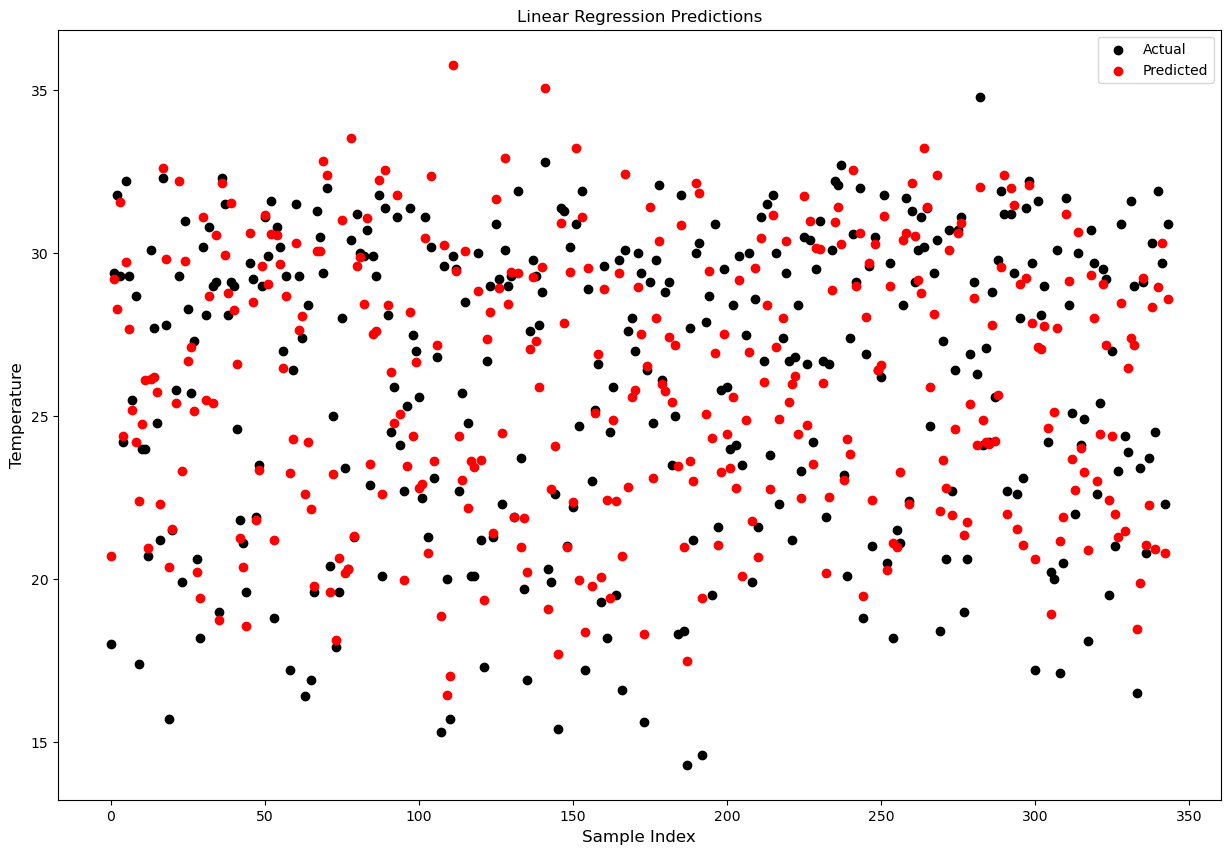

Polynomial Regression - Mean Squared Error: 3.16, R^2 Score: 0.85


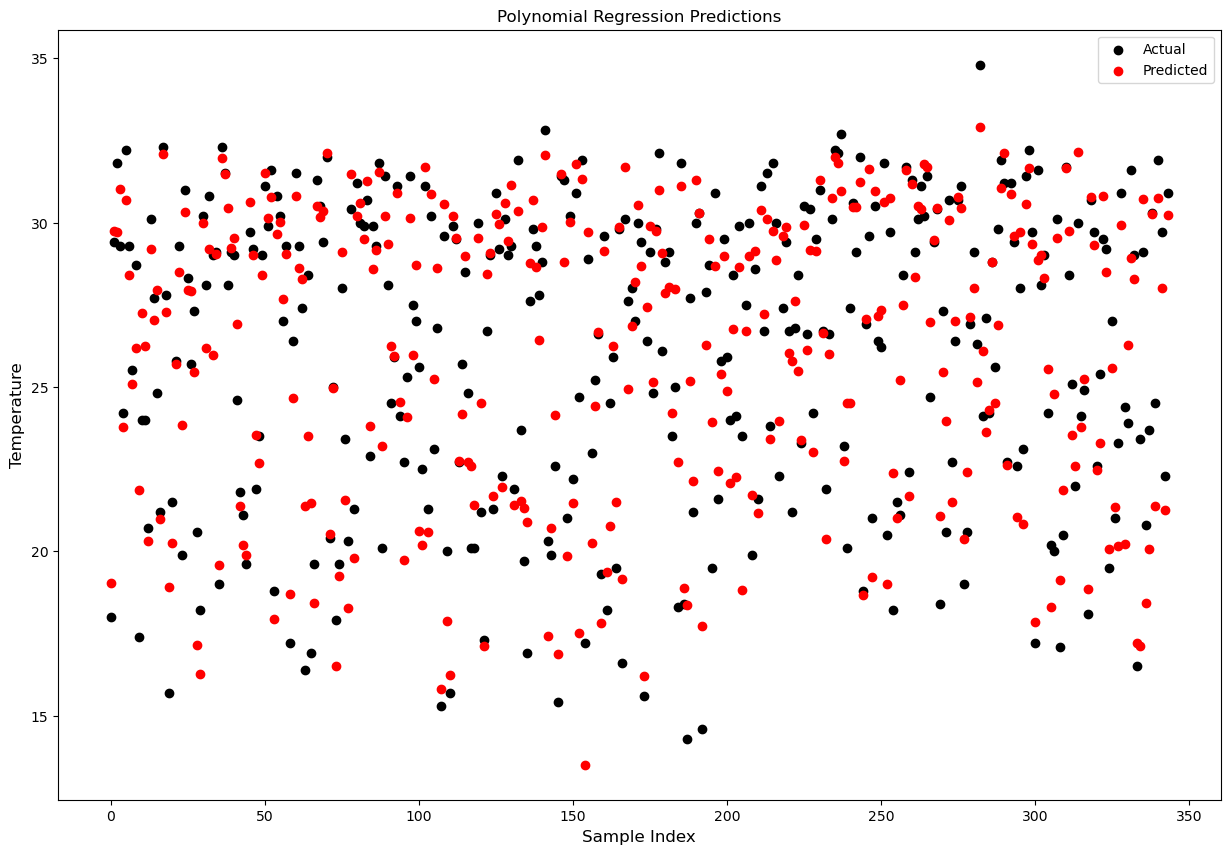

Random Forest - Mean Squared Error: 3.01, R^2 Score: 0.86


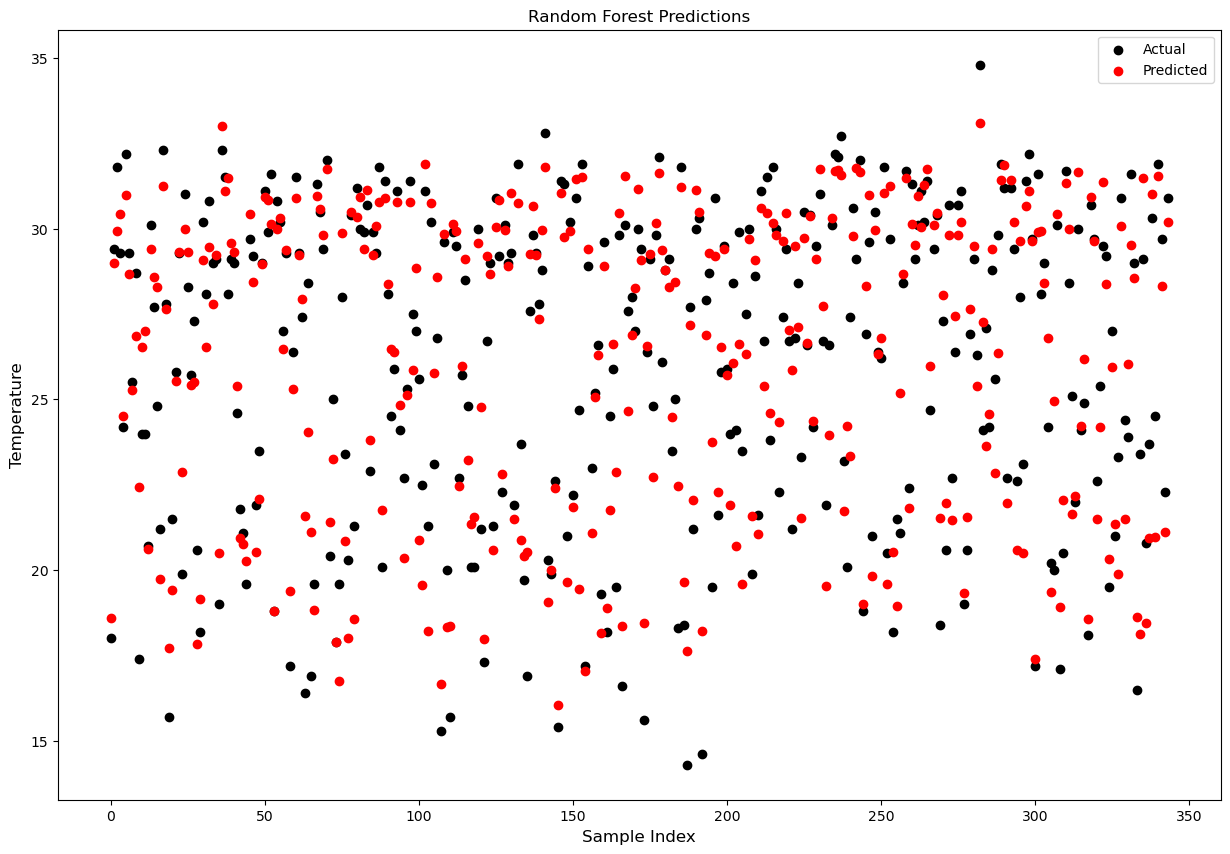

SVR - Mean Squared Error: 18.06, R^2 Score: 0.15


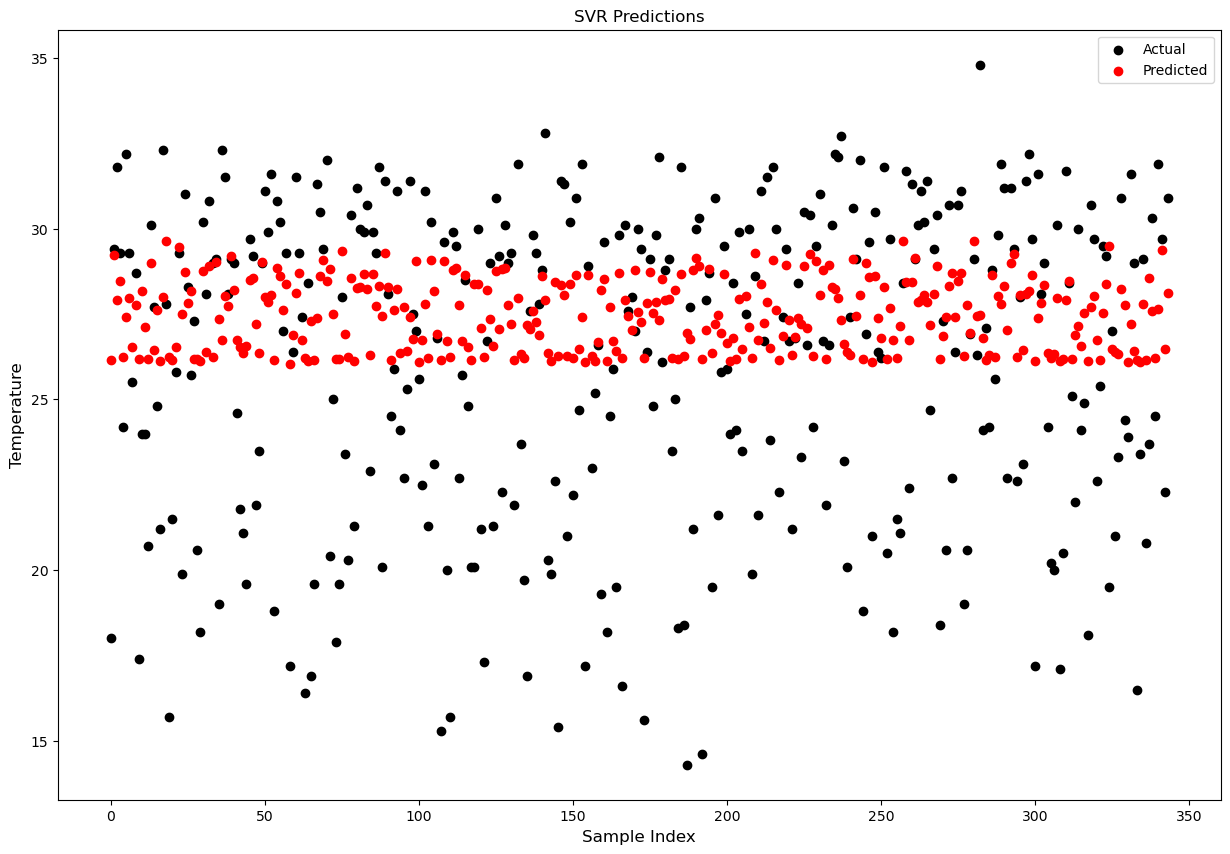

In [38]:
for name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse:.2f}, R^2 Score: {r2:.2f}")
    plt.figure(figsize=(15,10))
    plt.scatter(range(len(y_test)), y_test, color='black', label='Actual')
    plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted')
    plt.title(f'{name} Predictions')
    plt.xlabel('Sample Index',fontsize=12)
    plt.ylabel('Temperature',fontsize=12)
    plt.legend()
    plt.show()

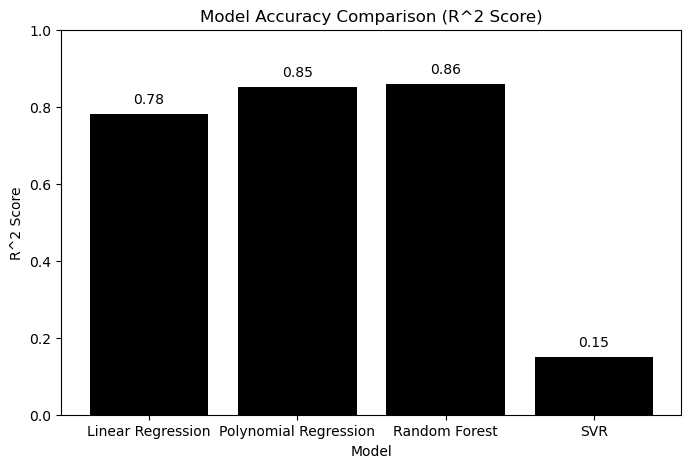

In [39]:
plt.figure(figsize=(8,5))
color=['black']
r2=[0.78, 0.85, 0.86 ,0.15]
model_names = list(models.keys())
plt.bar(model_names, r2, color=color)
plt.title('Model Accuracy Comparison (R^2 Score)')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)
for i, score in enumerate(r2):
    plt.text(i, score + 0.02, f"{score:.2f}", ha='center', va='bottom')
plt.show()